### Implementation of Principle Component Analysis (PCA)
### Objective --> To reduce dimensionality (features)

### Author - Dr. Virendra Singh Kushwah

In [ ]:
# importing some libraries
import numpy as np # for linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting the graph
import seaborn as sns # It is used to display details in HeatMap
%matplotlib inline # It defines that the plotted graph in inside notebook

UsageError: unrecognized arguments: # It defines that the plotted graph in inside notebook


In [ ]:
#df=pd.read_csv('VSK_PCA.csv', usecols=['Math', 'English', 'Art']) #Replace it with your path where the data file is stored
df=pd.read_csv('VSK_PCA.csv')
df.head() # It will display only top 5 rows, but we have only five rows.

,Student,Math,English,Art
0,1,90,60,90
1,2,90,90,30
2,3,60,60,60
3,4,60,60,90
4,5,30,30,30


In [ ]:
# What are the algorithmic steps for PCA?
# 1. Getting the data set
# 2. Make dataset meaning that we need to choose only relavent features
# 3. Standardized the data because of reduce the complexity for calculations
# 4. Determine the covariance matrix
# 5. Generate Eigen values and Eigen Vectors by using covariance matrix
# 6. Sorting the Eigen Vectors
# 7. Choose the Principle components
# 8. Remove unnecessary features

In [ ]:
# Describe method describes the various values of dataset like min, max, std etc.
df.describe()

,Student,Math,English,Art
count,5.000000,5.000000,5.000000,5.0
mean,3.000000,66.000000,60.000000,60.0
std,1.581139,25.099801,21.213203,30.0
min,1.000000,30.000000,30.000000,30.0
25%,2.000000,60.000000,60.000000,30.0
50%,3.000000,60.000000,60.000000,60.0
75%,4.000000,90.000000,60.000000,90.0
max,5.000000,90.000000,90.000000,90.0


In [ ]:
# How to determine that which features are correlated each others?
# We have o use corr() method for dataframe.
'''
df.corr() compute pairwise correlation of columns.
Correlation shows how the two variables are related to each other.
Positive values shows as one variable increases other variable increases as well. 
Negative values shows as one variable increases other variable decreases.
Bigger the values,more strongly two varibles are correlated and viceversa.
'''
df.corr()


,Student,Math,English,Art
Student,1.000000,-0.944911,-0.670820,-0.316228
Math,-0.944911,1.000000,0.845154,0.298807
English,-0.670820,0.845154,1.000000,0.000000
Art,-0.316228,0.298807,0.000000,1.000000


Text(0.5, 1.0, 'Correlation between different fearures')

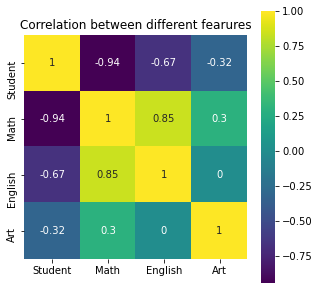

In [ ]:
# If you are choosing positive coorelation values, it means columns are having positive correlation.

# The variable will keep the correlation values and based on the values
# which are generated by this correlation variable

# Let us understand concept via Graph Visualization
correlation = df.corr()
plt.figure(figsize=(5,5))

# we are using heatmap graph to show the values in heat term w.r.t the values of correlated.
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='viridis')

plt.title('Correlation between different fearures')

In [ ]:
# Determining important features in terms of X 
# As we know Math, English and Art are the our important features to understand the concept.
# All features will be represented by X as independent variables.

X = df.iloc[:,1:4].values # 1-Math, 2-English, 3-Art 
X
# If you remember numerical portion where X is equivalent to A [] matrix.

array([[90, 60, 90],
       [90, 90, 30],
       [60, 60, 60],
       [60, 60, 90],
       [30, 30, 30]], dtype=int64)

In [ ]:
# size of the X 
np.shape(X)

(5, 3)

In [ ]:
# So far we have observed that we have large values in X due to we have selected all features.
# And to simplify the calculations, we need to transform the values in a standard way 
# for easy calculations

# For doing this we need to use StandardScaler class from preprocessing library by sklearn package.
# If you remember the step-3 of the algorithm.
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X) #passing the values of X
print (X) # original X values
print (X_std) # standardized values

# The formula can be used as mentioned below:-
# standard scaler value is calculated by mean and standard deviation.
# y = (x – mean) / standard_deviation

# y means new value of the X

[[90 60 90]
 [90 90 30]
 [60 60 60]
 [60 60 90]
 [30 30 30]]
[[ 1.06904497  0.          1.11803399]
 [ 1.06904497  1.58113883 -1.11803399]
 [-0.26726124  0.          0.        ]
 [-0.26726124  0.          1.11803399]
 [-1.60356745 -1.58113883 -1.11803399]]


In [ ]:
# Now it is time to calculate mean of the vectors towards the X_std variable
# because for covariance matrix, we must have covariance and for covariance we must have variance
# and last for variance we must have mean w.r.t to the vectors.

# covariance matrix <-- covarinace <-- variance <-- mean

# Before calculating co-variance matrix, first we must have mean vector

mean_vec = np.mean(X_std, axis=0) # axis=o means we need to calculate mean of the columns
#mean_vec = np.mean(X, axis=0)
print (mean_vec)

[4.4408921e-17 0.0000000e+00 0.0000000e+00]


In [ ]:
print (X_std.shape[0]) # It defines that total number of data i.e; n value
n=X_std.shape[0]
print (n)

5
5


In [ ]:
# After calculating mean vector, we need to calculate co-variance matrix

cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (n-1)

# Where T means transpose of the matrix

# (X_std - mean_vec).T.dot((X_std - mean_vec))
# The above statement is doing calculation between (x_std - mean_vec) and its transpose 
# in terms of matrices by multiplication
print('Covariance matrix \n%s' %cov_mat)

# As we have discussed co-variance matrix would be square matrix
# why we are getting 3 x 3 matrix , because of 3 features are used. 

# This is the end of the step-4 from algorithm.

Covariance matrix 
[[1.25000000e+00 1.05644282e+00 3.73508940e-01]
 [1.05644282e+00 1.25000000e+00 2.52510716e-17]
 [3.73508940e-01 2.52510716e-17 1.25000000e+00]]


In [ ]:
# print transpose of the co-variance matrix
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

# With the help of cov () method from numpy library you can get the covariance matrix.

# After getting transpose of the matrix, we are getting the original co-variance matrix.
# It means transpose of the covariance matrix must be same as original covariance matrix.

NumPy covariance matrix: 
[[1.25000000e+00 1.05644282e+00 3.73508940e-01]
 [1.05644282e+00 1.25000000e+00 2.52510716e-17]
 [3.73508940e-01 2.52510716e-17 1.25000000e+00]]


In [ ]:
# Now we need to determine the Eigen Vectors and Eigen Values
# This is the step-5 as algorithm.

# for doing this, we have to use eig() method from numpy library
# eig() method is a part of linear algebra class.

eig_vals, eig_vecs = np.linalg.eig(cov_mat) # we just need to pass only covariance matrix variable.

# If you remember numerical part of this code, we got the determinant value of the following equation
# det(A-lambda*I)
# A was covarinace matrix and I was identity matrix
# lambda was eigen value

print('Eigen Vectors \n%s' %eig_vecs)
print('\nEigen Values \n%s' %eig_vals)

Eigen Vectors 
[[ 7.07106781e-01  7.07106781e-01 -1.98160901e-16]
 [ 6.66666667e-01 -6.66666667e-01 -3.33333333e-01]
 [ 2.35702260e-01 -2.35702260e-01  9.42809042e-01]]

Eigen Values 
[2.37052682 0.12947318 1.25      ]


In [ ]:
# Make a list of (eigen value, eigen vector) tuples
# Here eig_pairs is variable which contain the pair values of both eigen value and eigen vectors

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
# with the help of list comprehensive method we can make a pair of eigen vector and eigen value

# Sort the (eigen value, eigen vector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True) # descending value will come first
# key=lamda is applicable when we need to sort the elements which are in a pair.

# Visually confirm that the list is correctly sorted by decreasing eigen values
print('Eigen values in descending order:')
for i in eig_pairs:
    print(i[0])

Eigen values in descending order:
2.3705268212509942
1.2500000000000002
0.12947317874900577


In [ ]:
# Here we are calculating "explained variance" with help of our calculated eigen values

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print (var_exp) # explained variance

# The explained variance will determine 
# that howmany components you will like to choose to reduce dimensionality.
# As we know that 3 features are using for computing, we must opt atleant one less features.
# You can choose 2 or 1 feature to reduce dimensionality.

# Suppose you are selecting 5 feature as a initial level.
# so at this moment you can opt 4,3,2 components to reduce dimensionality.


[63.21404856669318, 33.333333333333336, 3.4526180999734875]


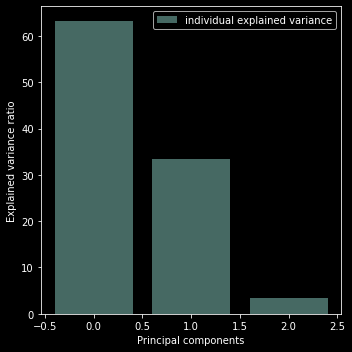

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(5, 5))

    plt.bar(range(3), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
# here we are choosing only two components after having see the above graph, which shows that only 
# two components are sufficient to solve your problem
# for doing next step, we need to opt only top two eigen values.

#eig_pairs[0][1] = 2.73 # as we have seen above
#eig_pairs[1][1] = 1.25

# Here we need to pass only eigen pairs for eigen value 2.73 and 1.25 those are top two values.
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), 
                      eig_pairs[1][1].reshape(3,1)
                    ))
print('Matrix W:\n', matrix_w)

# if you remember co-variance matrix was 3 x 3 (Square matrix)
# while here we are getting our W matrix i.e; 3 x 2 (d x k size where d is the dimension and k is the eigen vectors)

# As we know 3-features means you are on the 3D surface.
# But now selecting 2 components you are on the 2D sub-surface.
# So we will have tranformed values.

# we are reducing the dimension of the selected feaures on 2D sub-surface from 3D surface. 
# Here you can obsersed we have selected only two components as a feaures for solving your problem.

# This is step-7 as per algorithm.

Matrix W:
 [[ 7.07106781e-01 -1.98160901e-16]
 [ 6.66666667e-01 -3.33333333e-01]
 [ 2.35702260e-01  9.42809042e-01]]


In [ ]:
# you can multiply your w (3,2) matrix with x_std (3,3)
# and update y variable
# previously y was (5,1)
Y = X_std.dot(matrix_w)
Y # it provides the origianal size (actual dataset size = 5) of the matrix towards the w matrix 
# which is the resulatant matrix of the components.
# So size would be 2 x 5 where 2 means componets and 5 means total number of the data.

# This is step-8 as per algorithm.

# Do not have any confusion all the values are transformed values.


array([[ 1.01945208e+00,  1.05409255e+00],
       [ 1.54649836e+00, -1.58113883e+00],
       [-1.88982237e-01,  5.29607286e-17],
       [ 7.45409018e-02,  1.05409255e+00],
       [-2.45150911e+00, -5.27046277e-01]])

In [ ]:
Y.shape
# it is showing that you have chosen two features.

(5, 2)

In [ ]:
# You have seen each and every step of ths PCA algorithm.

# You can easily use a class to get the componets in a simple way.

from sklearn.decomposition import PCA
# we have to import PCA class from decomposition library from sklearn package.

# we need to fit the model towards the x_std variables.
pca = PCA().fit(X_std) # x_std will have the features in form of standardized form.

print ("Explained Variance: ")
print (100*pca.explained_variance_ratio_)


Explained Variance: 
[63.21404857 33.33333333  3.4526181 ]


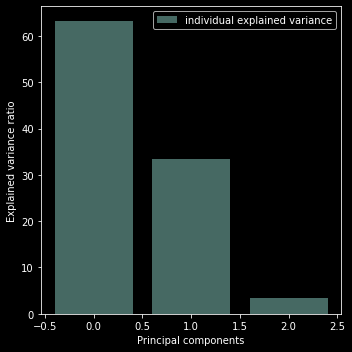

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(5, 5))

    plt.bar(range(3), 100*pca.explained_variance_ratio_, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()